In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [2]:

dataset_path = "D:\\suman.aids\\Cats vs Dogs"
sample_digit = "Petimages\\Cat"  
image_files = os.listdir(os.path.join(dataset_path, sample_digit))

In [3]:

image_path = os.path.join(dataset_path, sample_digit, image_files[0])
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


In [4]:

image = cv2.resize(image, (62, 62))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=(0, -1))  

In [5]:

filter_weights = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.float32)
filter_weights = filter_weights.reshape(3, 3, 1, 1) 


In [6]:

image_tensor = tf.constant(image)
filter_tensor = tf.constant(filter_weights)
output = tf.nn.conv2d(image_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='VALID')

In [7]:

feature_map = output.numpy().squeeze()  
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

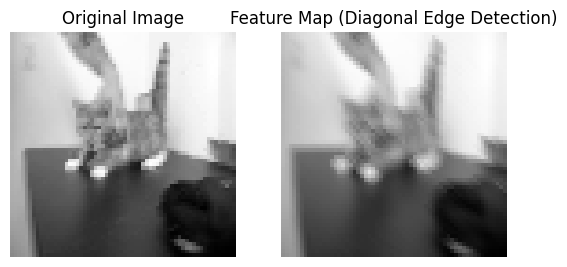

In [8]:

plt.subplot(1,2,1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (Diagonal Edge Detection)")
plt.axis("off")

plt.show()